In [41]:
import logging
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
from xcube.core.store import new_data_store

In [22]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s.%(msecs)03d %(name)s %(levelname)s - %(funcName)s: %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)
logging.getLogger("botocore.httpchecksum").setLevel(logging.WARNING)
LOG = logging.getLogger("deepfeatures_cubgen")

In [23]:
s3_store = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    max_depth=10,
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [24]:
data_ids = s3_store.list_data_ids()
data_ids = [data_id for data_id in data_ids if "cubes/training/0.1.0" in data_id]
data_ids

['cubes/training/0.1.0/0000_0.zarr',
 'cubes/training/0.1.0/0000_1.zarr',
 'cubes/training/0.1.0/0001_0.zarr',
 'cubes/training/0.1.0/0001_1.zarr',
 'cubes/training/0.1.0/0002_0.zarr',
 'cubes/training/0.1.0/0002_1.zarr',
 'cubes/training/0.1.0/0003_0.zarr',
 'cubes/training/0.1.0/0003_1.zarr',
 'cubes/training/0.1.0/0004_0.zarr',
 'cubes/training/0.1.0/0004_1.zarr',
 'cubes/training/0.1.0/0005_0.zarr',
 'cubes/training/0.1.0/0005_1.zarr',
 'cubes/training/0.1.0/0006_0.zarr',
 'cubes/training/0.1.0/0006_1.zarr',
 'cubes/training/0.1.0/0007_0.zarr',
 'cubes/training/0.1.0/0007_1.zarr',
 'cubes/training/0.1.0/0008_0.zarr',
 'cubes/training/0.1.0/0008_1.zarr',
 'cubes/training/0.1.0/0009_0.zarr',
 'cubes/training/0.1.0/0009_1.zarr',
 'cubes/training/0.1.0/0010_0.zarr',
 'cubes/training/0.1.0/0010_1.zarr',
 'cubes/training/0.1.0/0011_0.zarr',
 'cubes/training/0.1.0/0011_1.zarr',
 'cubes/training/0.1.0/0012_0.zarr',
 'cubes/training/0.1.0/0012_1.zarr',
 'cubes/training/0.1.0/0013_0.zarr',
 

In [25]:
len(data_ids)

6671

In [26]:
cube_ids = [int(data_id.split("/")[-1].split("_")[0]) for data_id in data_ids]
cube_ids = np.unique(cube_ids)
cube_ids

array([   0,    1,    2, ..., 4597, 4598, 4599], shape=(3700,))

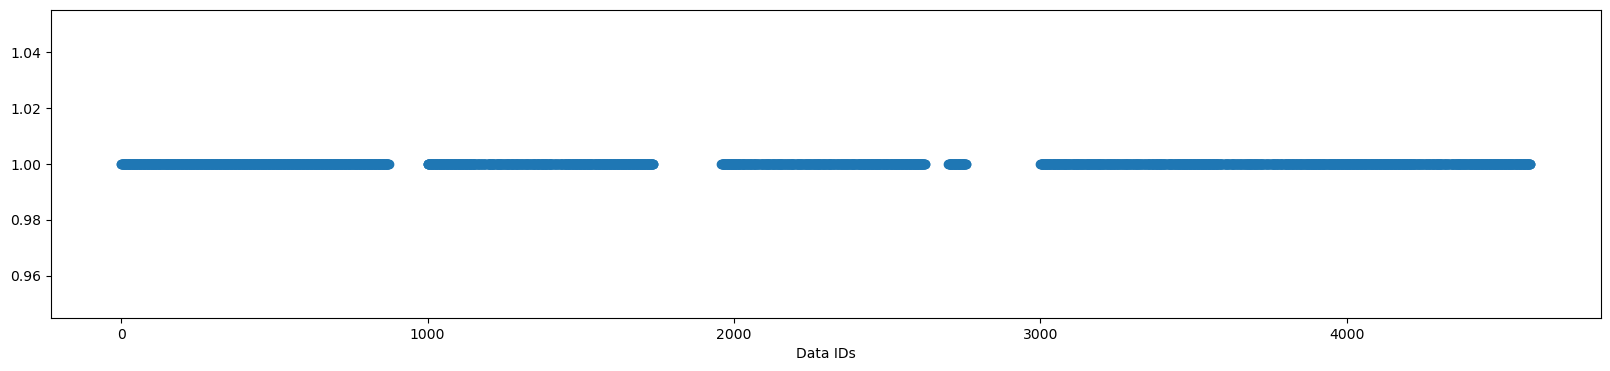

In [27]:
plt.figure(figsize=(20, 4))
plt.scatter(cube_ids, np.ones(len(cube_ids)))
plt.xlabel("Data IDs")
plt.show()

In [ ]:
with open("data_ids_timeslice_nan.txt", "w") as f:
    for data_id in data_ids:
        LOG.info(f"Checking {data_id}")
        ds = s3_store.open_data(data_id)
        found_nan = False
        for i in range(0, ds.sizes["time"], 5):
            array = ds["s2l2a"].isel(time=i).values.ravel()
            null_size = np.isnan(array).sum()
            perc = (null_size / array.size) * 100
            if perc > 99:
                LOG.warning(
                    f"Data variable s2l2a has {perc:.3f}% nan values for time slice {i}."
                )
                f.write(f"{data_id}\n")
                found_nan = True
                break
        if found_nan:
            break

In [5]:
len(data_ids)

1122

In [30]:
data_ids = s3_store.list_data_ids()
data_ids = [data_id for data_id in data_ids if "cubes/temp/training/" in data_id]
data_ids

['cubes/temp/training/0.1.0/0000_0.zarr',
 'cubes/temp/training/0.1.0/0000_1.zarr',
 'cubes/temp/training/0.1.0/0001_0.zarr',
 'cubes/temp/training/0.1.0/0001_1.zarr',
 'cubes/temp/training/0.1.0/0002_0.zarr',
 'cubes/temp/training/0.1.0/0002_1.zarr',
 'cubes/temp/training/0.1.0/0003_0.zarr',
 'cubes/temp/training/0.1.0/0003_1.zarr',
 'cubes/temp/training/0.1.0/0004_0.zarr',
 'cubes/temp/training/0.1.0/0004_1.zarr',
 'cubes/temp/training/0.1.0/0005_0.zarr',
 'cubes/temp/training/0.1.0/0005_1.zarr',
 'cubes/temp/training/0.1.0/0006_0.zarr',
 'cubes/temp/training/0.1.0/0006_1.zarr',
 'cubes/temp/training/0.1.0/0007_0.zarr',
 'cubes/temp/training/0.1.0/0007_1.zarr',
 'cubes/temp/training/0.1.0/0008_0.zarr',
 'cubes/temp/training/0.1.0/0008_1.zarr',
 'cubes/temp/training/0.1.0/0009_0.zarr',
 'cubes/temp/training/0.1.0/0009_1.zarr',
 'cubes/temp/training/0.1.0/0010_0.zarr',
 'cubes/temp/training/0.1.0/0010_1.zarr',
 'cubes/temp/training/0.1.0/0011_0.zarr',
 'cubes/temp/training/0.1.0/0011_1

In [31]:
len(data_ids)

8664

In [32]:
cube_ids = [data_id.split("/")[-1] for data_id in data_ids]
cube_ids

['0000_0.zarr',
 '0000_1.zarr',
 '0001_0.zarr',
 '0001_1.zarr',
 '0002_0.zarr',
 '0002_1.zarr',
 '0003_0.zarr',
 '0003_1.zarr',
 '0004_0.zarr',
 '0004_1.zarr',
 '0005_0.zarr',
 '0005_1.zarr',
 '0006_0.zarr',
 '0006_1.zarr',
 '0007_0.zarr',
 '0007_1.zarr',
 '0008_0.zarr',
 '0008_1.zarr',
 '0009_0.zarr',
 '0009_1.zarr',
 '0010_0.zarr',
 '0010_1.zarr',
 '0011_0.zarr',
 '0011_1.zarr',
 '0012_0.zarr',
 '0012_1.zarr',
 '0013_0.zarr',
 '0013_1.zarr',
 '0014_0.zarr',
 '0014_1.zarr',
 '0015_0.zarr',
 '0015_1.zarr',
 '0016_0.zarr',
 '0016_1.zarr',
 '0017_0.zarr',
 '0017_1.zarr',
 '0018_0.zarr',
 '0018_1.zarr',
 '0019_0.zarr',
 '0019_1.zarr',
 '0020_0.zarr',
 '0020_1.zarr',
 '0021_0.zarr',
 '0021_1.zarr',
 '0022_0.zarr',
 '0022_1.zarr',
 '0023_0.zarr',
 '0023_1.zarr',
 '0024_0.zarr',
 '0024_1.zarr',
 '0025_0.zarr',
 '0025_1.zarr',
 '0026_0.zarr',
 '0026_1.zarr',
 '0027_0.zarr',
 '0027_1.zarr',
 '0028_0.zarr',
 '0028_1.zarr',
 '0029_0.zarr',
 '0029_1.zarr',
 '0030_0.zarr',
 '0030_1.zarr',
 '0031_0

In [33]:
not_done = [f"{i:04d}_{j}.zarr" for i in range(4606) for j in range(2) if f"{i:04d}_{j}.zarr" not in cube_ids]
not_done

['0123_0.zarr',
 '0388_1.zarr',
 '1341_1.zarr',
 '1506_1.zarr',
 '2121_1.zarr',
 '2122_0.zarr',
 '2122_1.zarr',
 '2123_1.zarr',
 '2124_1.zarr',
 '2126_0.zarr',
 '2126_1.zarr',
 '2127_1.zarr',
 '2129_0.zarr',
 '2131_0.zarr',
 '2132_1.zarr',
 '2134_0.zarr',
 '2136_0.zarr',
 '2136_1.zarr',
 '2137_0.zarr',
 '2139_0.zarr',
 '2139_1.zarr',
 '2140_1.zarr',
 '2142_1.zarr',
 '2144_0.zarr',
 '2145_1.zarr',
 '2146_1.zarr',
 '2147_0.zarr',
 '2150_1.zarr',
 '2154_1.zarr',
 '2156_0.zarr',
 '2158_1.zarr',
 '2159_0.zarr',
 '2161_0.zarr',
 '2161_1.zarr',
 '2164_0.zarr',
 '2165_0.zarr',
 '2165_1.zarr',
 '2166_1.zarr',
 '2167_0.zarr',
 '2168_0.zarr',
 '2168_1.zarr',
 '2173_0.zarr',
 '2173_1.zarr',
 '2175_1.zarr',
 '2178_0.zarr',
 '2178_1.zarr',
 '2182_0.zarr',
 '2183_0.zarr',
 '2183_1.zarr',
 '2185_1.zarr',
 '2186_0.zarr',
 '2188_1.zarr',
 '2190_0.zarr',
 '2191_0.zarr',
 '2192_0.zarr',
 '2193_0.zarr',
 '2195_1.zarr',
 '2199_0.zarr',
 '2199_1.zarr',
 '2200_0.zarr',
 '2200_1.zarr',
 '2201_0.zarr',
 '2201_1

In [34]:
not_done_idx = [int(data_id.split("_")[0]) for data_id in not_done]
not_done_idx = np.unique(not_done_idx)
not_done_idx

array([ 123,  388, 1341, 1506, 2121, 2122, 2123, 2124, 2126, 2127, 2129,
       2131, 2132, 2134, 2136, 2137, 2139, 2140, 2142, 2144, 2145, 2146,
       2147, 2150, 2154, 2156, 2158, 2159, 2161, 2164, 2165, 2166, 2167,
       2168, 2173, 2175, 2178, 2182, 2183, 2185, 2186, 2188, 2190, 2191,
       2192, 2193, 2195, 2199, 2200, 2201, 2202, 2204, 2207, 2210, 2211,
       2214, 2215, 2221, 2224, 2226, 2227, 2228, 2229, 2230, 2231, 2232,
       2233, 2234, 2236, 2237, 2238, 2240, 2242, 2243, 2244, 2245, 2246,
       2249, 2250, 2255, 2256, 2261, 2263, 2264, 2268, 2269, 2270, 2271,
       2273, 2275, 2276, 2277, 2280, 2282, 2283, 2285, 2289, 2290, 2291,
       2292, 2294, 2295, 2296, 2300, 2301, 2302, 2303, 2306, 2308, 2313,
       2315, 2316, 2317, 2320, 2322, 2324, 2325, 2326, 2327, 2328, 2329,
       2330, 2331, 2333, 2334, 2335, 2338, 2339, 2341, 2342, 2343, 2344,
       2346, 2347, 2349, 2351, 2355, 2356, 2357, 2359, 2360, 2362, 2363,
       2364, 2365, 2366, 2369, 2370, 2372, 2374, 23

In [35]:
len(not_done_idx) // 6

71

In [46]:
not_done_idx[5* 71 : 6* 72]

array([3667, 3668, 3669, 3672, 3673, 3675, 3677, 3678, 3679, 3680, 3681,
       3682, 3685, 3686, 3689, 3692, 3695, 3697, 3698, 3702, 3705, 3706,
       3707, 3711, 3712, 3714, 3716, 3717, 3722, 3724, 3725, 3726, 3727,
       3728, 3729, 3730, 3731, 3732, 3734, 3736, 3738, 3739, 3740, 3742,
       3745, 3746, 3748, 3751, 3752, 3753, 3754, 3755, 3757, 3758, 3759,
       3761, 3763, 3765, 3766, 3774, 3776, 3778, 3779, 3780, 3781, 3783,
       3784, 3786, 3789, 3791, 3792, 3793, 3795, 3796, 3797, 3798])

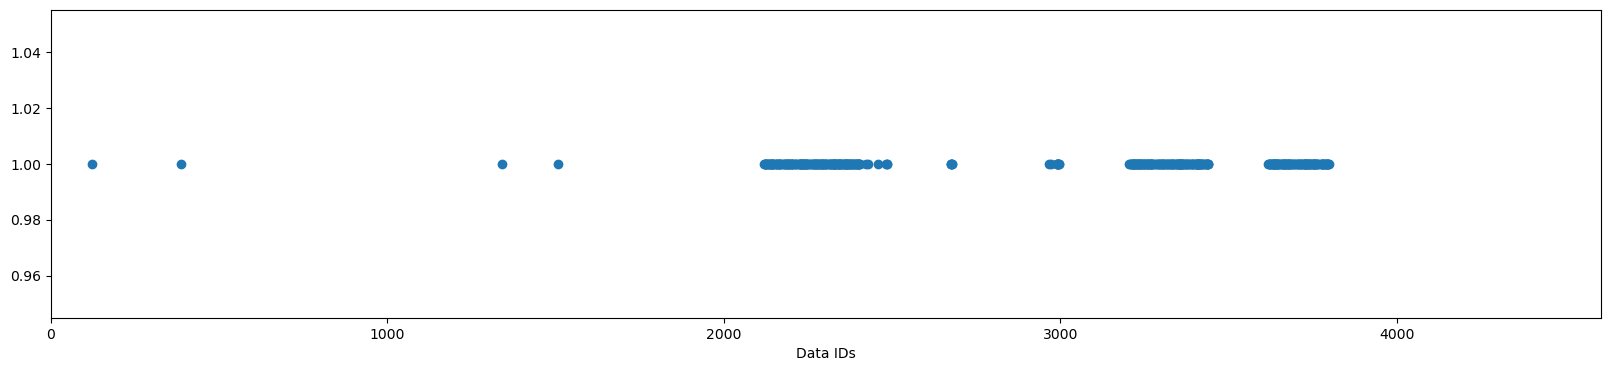

In [37]:
plt.figure(figsize=(20, 4))
plt.scatter(not_done_idx, np.ones(len(not_done_idx)))
plt.xlabel("Data IDs")
plt.xlim([0, 4606])
plt.show()

In [ ]:
with open("data_ids_timeslice_nan.txt", "w") as f:
    for data_id in data_ids:
        LOG.info(f"Checking {data_id}")
        ds = s3_store.open_data(data_id)
        found_nan = False
        for key in ds.keys():
            if key in ["solar_angle", "viewing_angle"]:
                continue
            for i in range(0, ds.sizes["time"], 10):
                array = ds[key].isel(time=i).values.ravel()
                null_size = np.isnan(array).sum()
                perc = (null_size / array.size) * 100
                if perc > 99:
                    LOG.warning(
                        f"Data variable {key} has {perc:.3f}% nan values for time slice {i}."
                    )
                    f.write(f"{data_id}\n")
                    found_nan = True
                    break
            if found_nan:
                break

In [ ]:
output_path = "data_ids_timebuffer.txt"
time_threshold = np.timedelta64(183, "D")

with open(output_path, "w") as f:
    for cube_idx in range(4606):
        LOG.info(f"Checking cube {cube_idx}")

        data_id0 = f"cubes/temp/training/0.1.0/{cube_idx:04d}_0.zarr"
        data_id1 = f"cubes/temp/training/0.1.0/{cube_idx:04d}_1.zarr"

        # Skip if one of the datasets is missing
        if not (s3_store.has_data(data_id0) and s3_store.has_data(data_id1)):
            continue

        ds0 = s3_store.open_data(data_id0)
        ds1 = s3_store.open_data(data_id1)

        # Ensure we compare the earlier dataset first
        if ds0.time[0] > ds1.time[0]:
            ds0, ds1 = ds1, ds0

        delta = ds1.time[0] - ds0.time[-1]
        if delta < time_threshold:
            LOG.warning(f"Time axis too close: {ds0.time[-1].values} and {ds1.time[0].values}")
            f.write(f"{cube_idx}\n")

2025-11-03 14:17:24.970 deepfeatures_cubgen INFO - <module>: Checking cube 0
2025-11-03 14:17:25.673 deepfeatures_cubgen WARNING - <module>: Time axis too close: 2022-08-13T10:46:29.024000000 and 2021-08-16T10:56:21.024000000
2025-11-03 14:17:25.674 deepfeatures_cubgen INFO - <module>: Checking cube 1
2025-11-03 14:17:26.350 deepfeatures_cubgen INFO - <module>: Checking cube 2
2025-11-03 14:17:27.048 deepfeatures_cubgen INFO - <module>: Checking cube 3
2025-11-03 14:17:27.859 deepfeatures_cubgen WARNING - <module>: Time axis too close: 2023-06-19T10:46:29.024000000 and 2022-08-30T10:36:29.024000000
2025-11-03 14:17:27.859 deepfeatures_cubgen INFO - <module>: Checking cube 4
2025-11-03 14:17:28.628 deepfeatures_cubgen INFO - <module>: Checking cube 5
2025-11-03 14:17:29.415 deepfeatures_cubgen INFO - <module>: Checking cube 6
2025-11-03 14:17:30.172 deepfeatures_cubgen INFO - <module>: Checking cube 7
2025-11-03 14:17:30.878 deepfeatures_cubgen INFO - <module>: Checking cube 8
2025-11-0

In [10]:
with open("data_ids_timebuffer.txt", "r") as f:
    data_ids_timeslice_nan = f.read().splitlines()
data_ids_timeslice_nan

['cubes/temp/training/0.1.0/0004_0.zarr',
 'cubes/temp/training/0.1.0/0006_0.zarr',
 'cubes/temp/training/0.1.0/0018_1.zarr',
 'cubes/temp/training/0.1.0/0019_0.zarr',
 'cubes/temp/training/0.1.0/0019_1.zarr',
 'cubes/temp/training/0.1.0/0021_1.zarr',
 'cubes/temp/training/0.1.0/0040_1.zarr',
 'cubes/temp/training/0.1.0/0055_0.zarr',
 'cubes/temp/training/0.1.0/0055_1.zarr',
 'cubes/temp/training/0.1.0/0058_0.zarr',
 'cubes/temp/training/0.1.0/0058_1.zarr',
 'cubes/temp/training/0.1.0/0059_1.zarr',
 'cubes/temp/training/0.1.0/0062_0.zarr',
 'cubes/temp/training/0.1.0/0069_0.zarr',
 'cubes/temp/training/0.1.0/0072_0.zarr',
 'cubes/temp/training/0.1.0/0086_0.zarr',
 'cubes/temp/training/0.1.0/0086_1.zarr',
 'cubes/temp/training/0.1.0/0111_0.zarr',
 'cubes/temp/training/0.1.0/0121_1.zarr',
 'cubes/temp/training/0.1.0/0124_1.zarr',
 'cubes/temp/training/0.1.0/0128_1.zarr',
 'cubes/temp/training/0.1.0/0137_1.zarr',
 'cubes/temp/training/0.1.0/0152_0.zarr',
 'cubes/temp/training/0.1.0/0159_0